<a href="https://colab.research.google.com/github/dimas1625/PCVK_GANJIL_2025/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tugas Praktikum


##1. Buat Gamma Correction sesuai dengan petunjuk berikut

Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


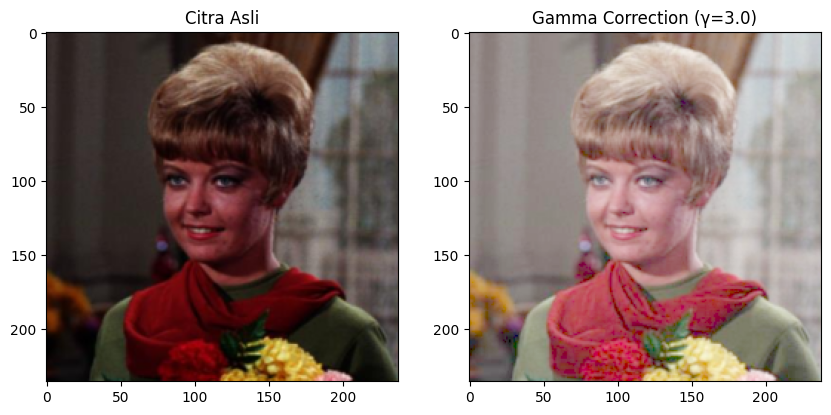

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Pastikan path sesuai file kamu
img = cv.imread("/content/drive/MyDrive/Female.png")

# Ubah ke RGB biar tampil benar di matplotlib
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

print('Gamma Correction pada citra')
print('----------------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))
    if gamma <= 0:
        raise ValueError("Gamma harus lebih besar dari 0")
except ValueError:
    print('Error: Input tidak valid, harus berupa angka > 0')
    gamma = 1.0  # nilai default

# Proses Gamma Correction
gamma_corrected = np.array(255 * (img_rgb / 255) ** (1 / gamma), dtype='uint8')

# Tampilkan hasil
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")

plt.subplot(1,2,2)
plt.imshow(gamma_corrected)
plt.title(f"Gamma Correction (γ={gamma})")

plt.show()


##2. Buat Simulasi Image Depth

Simulasi Image Depth (Bit Depth Reduction)
--------------------------------------------
Masukkan nilai bit depth (1-7): 3


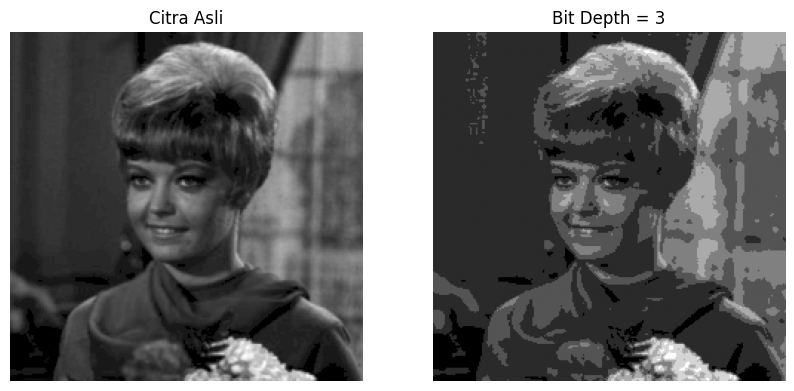

In [13]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Baca citra dan ubah ke grayscale
original = cv.imread("/content/drive/MyDrive/Female.png", cv.IMREAD_GRAYSCALE)

print("Simulasi Image Depth (Bit Depth Reduction)")
print("--------------------------------------------")

# Input bit depth
bit_depth = int(input("Masukkan nilai bit depth (1-7): "))

# Hitung level kuantisasi
level = 255 / (pow(2, bit_depth) - 1)

# Kuantisasi citra
depth_image = np.round(original / level) * level
depth_image = np.clip(depth_image, 0, 255).astype(np.uint8)

# Tampilkan hasil
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(original, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(depth_image, cmap='gray')
plt.title(f'Bit Depth = {bit_depth}')
plt.axis('off')

plt.show()


##3. Buat modul Average Denoising

Dibuat 100 citra dengan Gaussian noise.


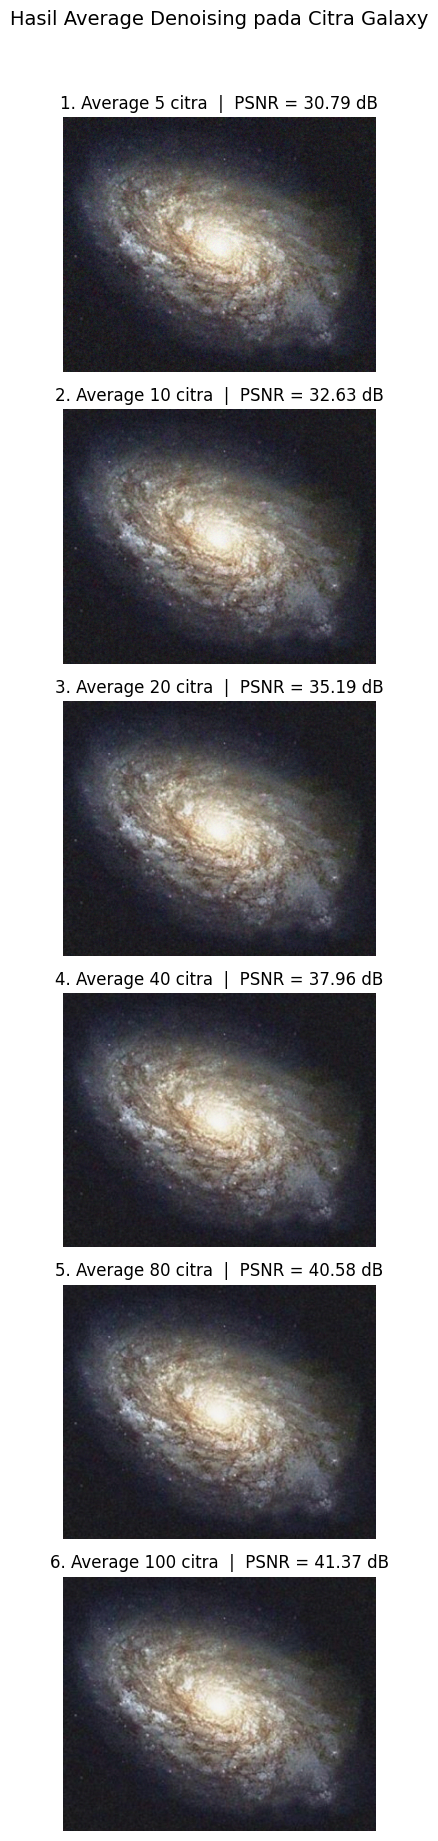

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

# --- Fungsi PSNR ---
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr

# --- Baca citra asli (galaxy) ---
original_path = '/content/drive/MyDrive/galaxy.png'
original = cv.imread(original_path)
if original is None:
    raise FileNotFoundError(f"Gambar asli tidak ditemukan di: {original_path}")

original = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# --- Buat 100 citra dengan Gaussian noise ---
noisy_images = []
num_images = 100
mean = 0
sigma = 20  # semakin besar, noise makin jelas

for i in range(num_images):
    noise = np.random.normal(mean, sigma, original.shape).astype(np.float32)
    noisy_img = np.clip(original + noise, 0, 255).astype(np.uint8)
    noisy_images.append(noisy_img)

print(f"Dibuat {len(noisy_images)} citra dengan Gaussian noise.")

# --- Daftar jumlah citra untuk di-average ---
jumlah_citra = [5, 10, 20, 40, 80, 100]

# --- Proses average dan tampilkan hasil ---
fig, axes = plt.subplots(len(jumlah_citra), 1, figsize=(6, len(jumlah_citra)*3))
fig.suptitle("Hasil Average Denoising pada Citra Galaxy", fontsize=14, y=1.02)

for i, jumlah in enumerate(jumlah_citra):
    avg = np.mean(noisy_images[:jumlah], axis=0).astype(np.uint8)
    nilai_psnr = PSNR(original, avg)

    axes[i].imshow(avg)
    axes[i].set_title(f"{i+1}. Average {jumlah} citra  |  PSNR = {nilai_psnr:.2f} dB")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


##4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:

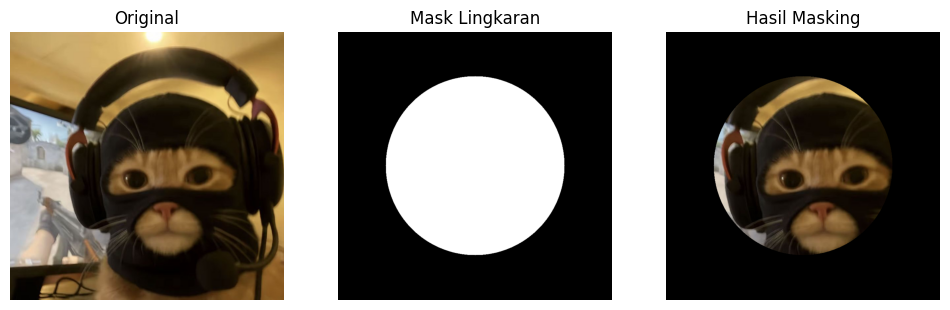

In [29]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
img = cv.imread('/content/drive/MyDrive/cat1.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Buat mask kosong
mask = np.zeros(img.shape[:2], dtype="uint8")

# Tambahkan lingkaran penuh di tengah
center = (img.shape[1]//2, img.shape[0]//2)
radius = min(img.shape[0], img.shape[1])//3
cv.circle(mask, center, radius, 255, -1)

# Masking
masked = cv.bitwise_and(img, img, mask=mask)

# Tampilkan hasil
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(mask, cmap="gray"); plt.title("Mask Lingkaran"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(masked); plt.title("Hasil Masking"); plt.axis("off")
plt.show()


##5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu

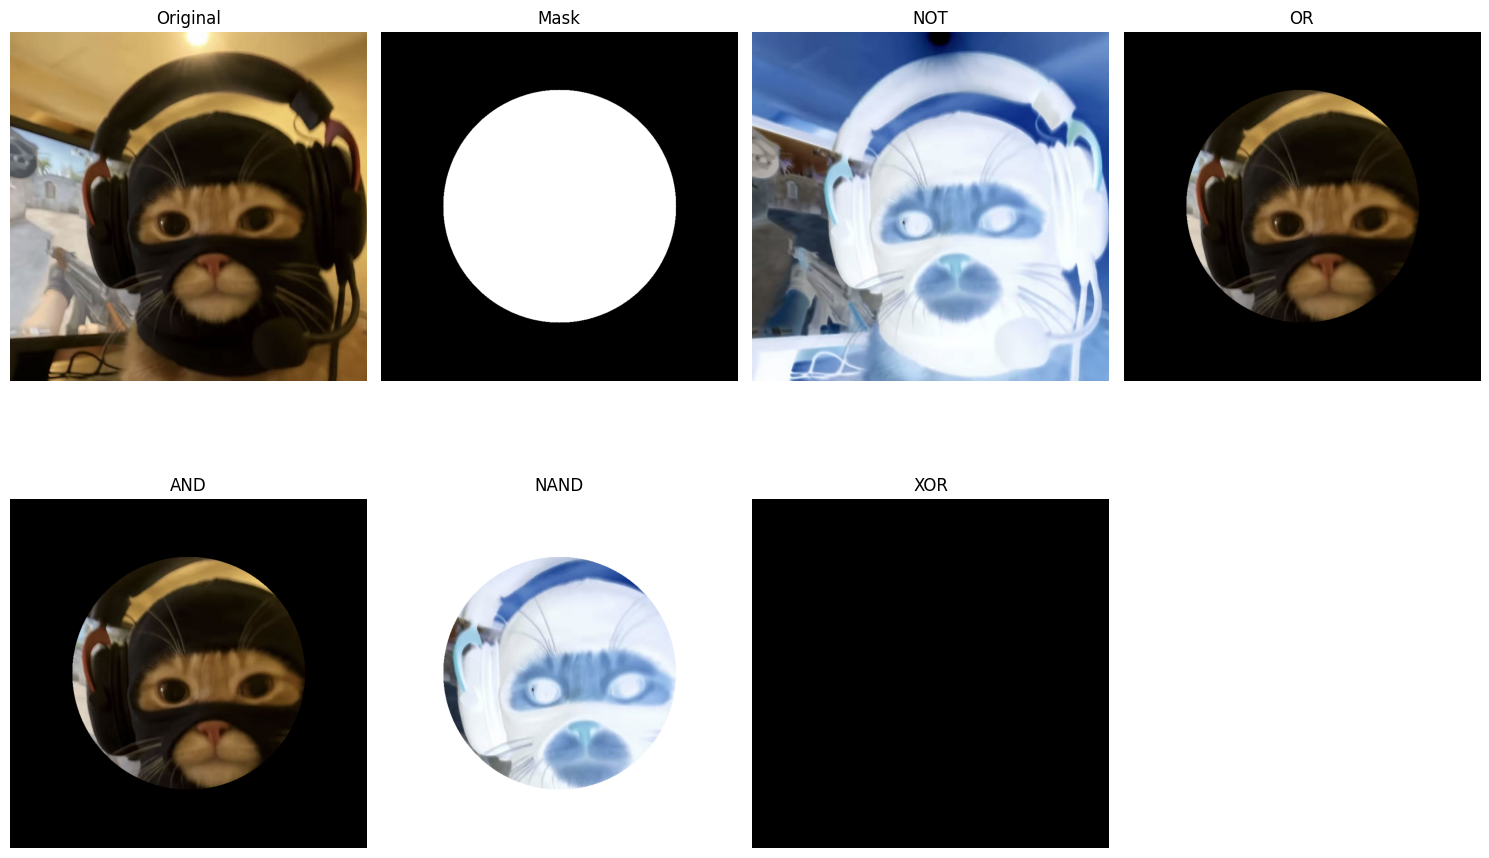

In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar asli
img = cv.imread('/content/drive/MyDrive/cat1.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# 2. Buat mask (lingkaran putih di tengah)
mask = np.zeros(img.shape[:2], dtype="uint8")
center = (img.shape[1]//2, img.shape[0]//2)
radius = min(img.shape[0], img.shape[1])//3
cv.circle(mask, center, radius, 255, -1)

# 3. Operator logika
not_img  = cv.bitwise_not(img)                        # NOT / komplemen
or_img   = cv.bitwise_or(img, img, mask=mask)         # OR
and_img  = cv.bitwise_and(img, img, mask=mask)        # AND
nand_img = cv.bitwise_not(and_img)                    # NAND = NOT(AND)
xor_img  = cv.bitwise_xor(img, img, mask=mask)        # XOR

# 4. Tampilkan hasil
titles = ["Original", "Mask", "NOT", "OR", "AND", "NAND", "XOR"]
images = [img, mask, not_img, or_img, and_img, nand_img, xor_img]

plt.figure(figsize=(15,10))
for i in range(len(images)):
    plt.subplot(2,4,i+1)
    if i==1:  # mask tampil grayscale
        plt.imshow(images[i], cmap="gray")
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()


## Hasil analisa:

1. Gamma correction digunakan untuk mengatur kecerahan/kontras citra dengan transformasi non-linear.

2. Bit depth berpengaruh pada jumlah gradasi warna: semakin rendah bit depth, semakin sederhana citra.

3. Average denoising terbukti bisa mengurangi noise acak, dan PSNR menjadi metrik penting untuk mengukur kualitas hasil.

4. Image masking dengan operator logika memungkinkan manipulasi citra berbasis area/region tertentu.

5. Operator logika (NOT, OR, AND, NAND, XOR) memberi efek berbeda, dan dapat dimanfaatkan untuk berbagai aplikasi pengolahan citra seperti filtering, segmentasi, dan analisis citra.